I will create a virtual environment using poetry and add the packages i need throughout the project

Steps: 

1. Find the path of your document (type "pwd" on terminal)
2. Type "poetry init" to initialize the project
3. Type "Poetry shell" to activate the virtual environment
4. Choose the new vr from "select kernel" on up right corner
5. Add dependencies using "poetry add" (you can check the packgages and their versions from your pyproject.toml file) * in my case i didn't need to run poetry install comment since when poetry add is used it also installs automatically

In [2]:
# A test to see if imported package is working
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


After setting up the project envrionment, I will now download the dataset from Kaggle

In [ ]:
import pandas as pd
train_set = "/Users/serraus/Desktop/house-prices-advanced-regression-techniques/train.csv"
pd.read_csv(train_set)


* The data set has 1460 rows and 81 columns. If we exculde the "Id" column, there are 79 different features, which are qualities of a hosue in Iowa region, in our dataset that might effect the target which is the "SalePrice" of a house. 
* The data consists of categorical data like in the "Street" column as well as numerical data as in for example "LotArea" column.
* The data looks dirty since there are some "NaN" values in columns like "Alley". 

I want to see some statistics to help me understand my data more. Running the .describe() command will show me some meaningful values. 

In [17]:
data = pd.read_csv(train_set)
print(data.describe()) #to see descriptive statistics of each column

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Although some measures are meaningless such as the mean of id column, many are valuable like the mean LotArea in houses in Iowa region.

In order to have some visualization let's pick a random feture and see it's relationship with our target SalePrice in a regression graph.
I will pick LotArea as my feture in other words x value and SalePrice will be y.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

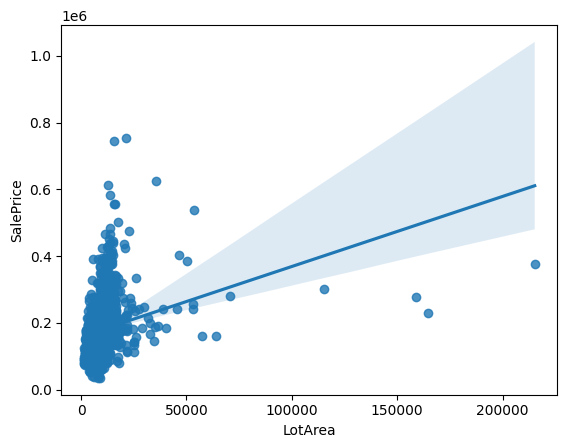

In [16]:
import seaborn as sns #seaborn is the library i will use for graphs
sns.regplot(x = data["LotArea"], y = data["SalePrice"]) #regplot is for a regression graph


This graph is badly scaled since SalePrice values are much larger than LotArea values. But as a general comment we can say that it seems like as the LotArea increases SalePrice tend to increase.

Now that we have our data, we need to first clean it so that our machine learning models can perform better and faster.


One can perform data cleaning in many different ways:
1. Deleting rows that have missing values (This method is hardly ever accepted as this possibly deletes every row in our data set)  
2. Deleting columns that have missing values (This method works much better than number 1)